In [1]:
import numpy as np
import pandas as pd
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#cogemos los datos de la estación Barcelona-Poblenou
url_fichero = '../datosbarcelona_aqicn_org/barcelona-(poblenou), catalunya, spain-air-quality.csv'
dfContBarcPobl = pd.read_csv(url_fichero)

#cambiamos el encabezado para eliminar los espacios con los que viene el .csv en los títulos de las columnas.
columnNames = ['date','pm10','o3','no2','so2','co']
dfContBarcPobl.columns = columnNames
dfContBarcPobl.head()


,date,pm10,o3,no2,so2,co
0,2021/2/1,15,,21,,
1,2021/2/2,23,,22,,
2,2021/2/3,28,,14,,
3,2021/2/4,34,,13,,
4,2021/2/5,22,,11,,


In [2]:
dfContBarcPobl.dtypes

date    object
pm10    object
o3      object
no2     object
so2     object
co      object
dtype: object

In [3]:
#Establecemos los tipos adecuados de los campos
dfContBarcPobl ['date'] = pd.to_datetime(dfContBarcPobl['date'], format='%Y-%m-%d', errors='coerce')
dfContBarcPobl ['pm10'] = pd.to_numeric(dfContBarcPobl['pm10'], errors='coerce')
dfContBarcPobl ['o3'] = pd.to_numeric(dfContBarcPobl['o3'], errors='coerce')
dfContBarcPobl ['no2'] = pd.to_numeric(dfContBarcPobl['no2'], errors='coerce')
dfContBarcPobl ['so2'] = pd.to_numeric(dfContBarcPobl['so2'], errors='coerce')
dfContBarcPobl ['co'] = pd.to_numeric(dfContBarcPobl['co'], errors='coerce')

In [4]:
print(dfContBarcPobl)
print(dfContBarcPobl.dtypes)
print(dfContBarcPobl.describe())

           date  pm10  o3   no2  so2  co
0    2021-02-01  15.0 NaN  21.0  NaN NaN
1    2021-02-02  23.0 NaN  22.0  NaN NaN
2    2021-02-03  28.0 NaN  14.0  NaN NaN
3    2021-02-04  34.0 NaN  13.0  NaN NaN
4    2021-02-05  22.0 NaN  11.0  NaN NaN
...         ...   ...  ..   ...  ...  ..
2289 2014-09-26   NaN NaN  17.0  NaN NaN
2290 2014-09-27   NaN NaN  18.0  NaN NaN
2291 2014-09-28   NaN NaN  17.0  NaN NaN
2292 2014-09-29   NaN NaN  16.0  NaN NaN
2293 2014-09-30   NaN NaN  16.0  NaN NaN

[2294 rows x 6 columns]
date    datetime64[ns]
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object
              pm10          o3          no2        so2   co
count  1830.000000  195.000000  2271.000000  19.000000  0.0
mean     24.138251   26.241026    17.971819   1.368421  NaN
std      10.302638   16.011541     7.273154   1.116071  NaN
min       1.000000    1.000000     2.000000   1.000000  NaN
25%      17.000000   15.000000 

Averiguamos cuántos nulos nos vienen en cada columna:

In [5]:
dfContBarcPobl.isnull().sum()

date       0
pm10     464
o3      2099
no2       23
so2     2275
co      2294
dtype: int64

La columna de medida de CO no trae ningún dato, y las columnas de SO2 y de O3 traen apenas unos pocos.
Por tanto, tendremos que quitar dichas medidas y nos quedamos exclusivamente con las medidas de PM10 y NO2

In [6]:
dfContBarcPobl_PM10_NO2 = dfContBarcPobl.drop(['co','so2','o3'], axis=1)
print(dfContBarcPobl_PM10_NO2)
print(dfContBarcPobl_PM10_NO2.describe())

           date  pm10   no2
0    2021-02-01  15.0  21.0
1    2021-02-02  23.0  22.0
2    2021-02-03  28.0  14.0
3    2021-02-04  34.0  13.0
4    2021-02-05  22.0  11.0
...         ...   ...   ...
2289 2014-09-26   NaN  17.0
2290 2014-09-27   NaN  18.0
2291 2014-09-28   NaN  17.0
2292 2014-09-29   NaN  16.0
2293 2014-09-30   NaN  16.0

[2294 rows x 3 columns]
              pm10          no2
count  1830.000000  2271.000000
mean     24.138251    17.971819
std      10.302638     7.273154
min       1.000000     2.000000
25%      17.000000    12.000000
50%      23.000000    17.000000
75%      30.000000    23.000000
max     153.000000    60.000000


Visualizamos un scatterplot

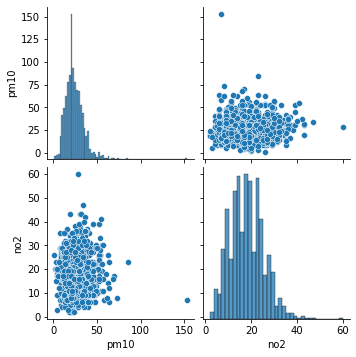

In [7]:
sns.pairplot(dfContBarcPobl_PM10_NO2);

Y observamos la correlación entre las medidas:

In [8]:
#matriz de correlaciones
dfContBarcPobl_PM10_NO2.corr()

,pm10,no2
pm10,1.000000,0.097698
no2,0.097698,1.000000


Vemos que no hay correlación prácticamente entre ambos contaminantes

In [9]:
#matriz de covarianzas
dfContBarcPobl_PM10_NO2.cov()

,pm10,no2
pm10,106.144353,7.280094
no2,7.280094,52.898765


Ahora vamos a quedarnos con los datos de 2020 exclusivamente. Para ello vamos a convertir la fecha en índice y rellenaremos los posibles días que no tengan datos con filas con NaN como dato, para posteriormente rellenarlos con medias.

In [10]:
#primero ordenamos el dataset por fecha descendente
dfContBarcPobl_PM10_NO2 = dfContBarcPobl_PM10_NO2.sort_values(by='date', ascending=False)
print(dfContBarcPobl_PM10_NO2)

           date  pm10   no2
8    2021-02-09  15.0   NaN
7    2021-02-08  12.0  13.0
6    2021-02-07  56.0  19.0
5    2021-02-06  47.0   6.0
4    2021-02-05  22.0  11.0
...         ...   ...   ...
2292 2014-09-29   NaN  16.0
2291 2014-09-28   NaN  17.0
2290 2014-09-27   NaN  18.0
2289 2014-09-26   NaN  17.0
2288 2014-09-25   NaN  15.0

[2294 rows x 3 columns]


In [11]:
#establecemos la fecha como índice
dfContBarcPobl_PM10_NO2 = dfContBarcPobl_PM10_NO2.set_index('date')
print(dfContBarcPobl_PM10_NO2)

            pm10   no2
date                  
2021-02-09  15.0   NaN
2021-02-08  12.0  13.0
2021-02-07  56.0  19.0
2021-02-06  47.0   6.0
2021-02-05  22.0  11.0
...          ...   ...
2014-09-29   NaN  16.0
2014-09-28   NaN  17.0
2014-09-27   NaN  18.0
2014-09-26   NaN  17.0
2014-09-25   NaN  15.0

[2294 rows x 2 columns]


In [12]:
#ahora hacemos un resample por día para garantizar que cada día tenga su registro. 
#Aquellos días que no tuvieran datos se quedan con NaN.

dfContBarcPobl_PM10_NO2 = dfContBarcPobl_PM10_NO2.resample('D').median()
print(dfContBarcPobl_PM10_NO2)

            pm10   no2
date                  
2014-09-25   NaN  15.0
2014-09-26   NaN  17.0
2014-09-27   NaN  18.0
2014-09-28   NaN  17.0
2014-09-29   NaN  16.0
...          ...   ...
2021-02-05  22.0  11.0
2021-02-06  47.0   6.0
2021-02-07  56.0  19.0
2021-02-08  12.0  13.0
2021-02-09  15.0   NaN

[2330 rows x 2 columns]


In [13]:
dfContBarcPobl_PM10_NO2_2020 = dfContBarcPobl_PM10_NO2['2020']
print(dfContBarcPobl_PM10_NO2_2020)

            pm10   no2
date                  
2020-01-01  17.0  18.0
2020-01-02  16.0  18.0
2020-01-03  18.0  15.0
2020-01-04  18.0  12.0
2020-01-05  12.0  18.0
...          ...   ...
2020-12-27  10.0   7.0
2020-12-28  15.0   8.0
2020-12-29  16.0   8.0
2020-12-30  13.0  12.0
2020-12-31  14.0  12.0

[366 rows x 2 columns]


In [14]:
dfContBarcPobl_PM10_NO2_2020.isnull().sum()

pm10    2
no2     0
dtype: int64

Rellenamos los nulos con los valores medios:

In [15]:
#Primero creamos la copia para rellenar
dfContBarcPobl_PM10_NO2_2020_rellenado = dfContBarcPobl_PM10_NO2_2020.copy()

#Importamos la función SimpleImputer del módulo sklearn.impute
from sklearn.impute import SimpleImputer

#Instanciamos el imputador de estrategia media
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

#Ahora rellenamos los valores faltantes de ambos contaminantes con los valores medios.
dfContBarcPobl_PM10_NO2_2020_rellenado['pm10'] = imp_mean.fit_transform(dfContBarcPobl_PM10_NO2_2020['pm10'].values.reshape(-1,1))
dfContBarcPobl_PM10_NO2_2020_rellenado['no2'] = imp_mean.fit_transform(dfContBarcPobl_PM10_NO2_2020['no2'].values.reshape(-1,1))

print(dfContBarcPobl_PM10_NO2_2020_rellenado)

            pm10   no2
date                  
2020-01-01  17.0  18.0
2020-01-02  16.0  18.0
2020-01-03  18.0  15.0
2020-01-04  18.0  12.0
2020-01-05  12.0  18.0
...          ...   ...
2020-12-27  10.0   7.0
2020-12-28  15.0   8.0
2020-12-29  16.0   8.0
2020-12-30  13.0  12.0
2020-12-31  14.0  12.0

[366 rows x 2 columns]


In [16]:
dfContBarcPobl_PM10_NO2_2020_rellenado.isnull().sum()

pm10    0
no2     0
dtype: int64

Pintamos la serie temporal de cada medida:

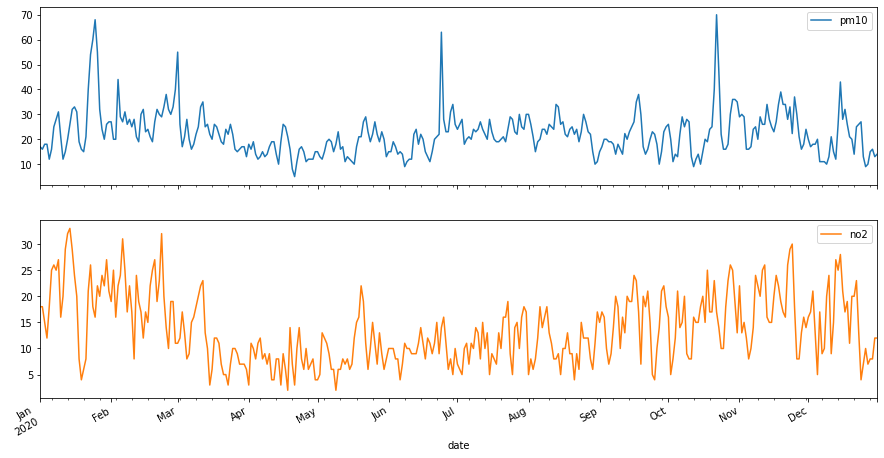

In [17]:
dfContBarcPobl_PM10_NO2_2020_rellenado.plot(subplots = True, figsize=(15,8));

Pintamos la gráfica de densidad de cada contaminante, y vemos que sus medidas son del mismo orden de magnitud

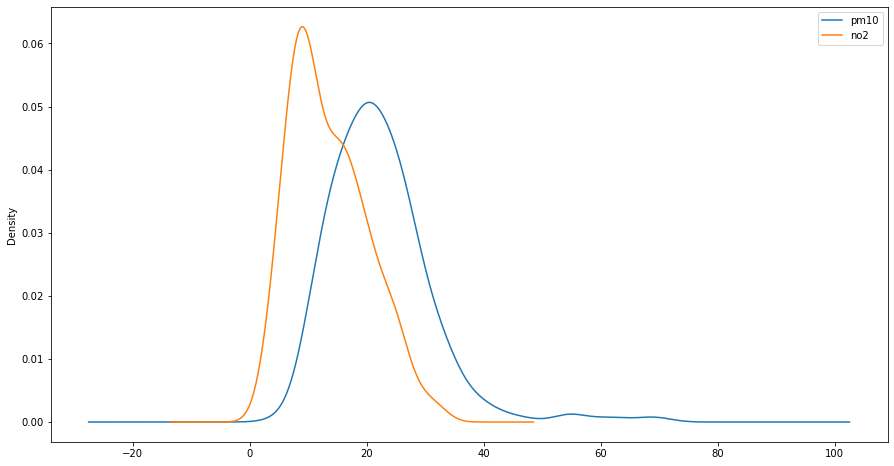

In [18]:
dfContBarcPobl_PM10_NO2_2020_rellenado.plot(kind = 'density',figsize=(15,8));

In [19]:
print(dfContBarcPobl_PM10_NO2_2020_rellenado.describe())

             pm10         no2
count  366.000000  366.000000
mean    22.285714   13.617486
std      8.896403    6.570263
min      5.000000    2.000000
25%     16.000000    8.000000
50%     21.000000   12.000000
75%     26.000000   18.000000
max     70.000000   33.000000


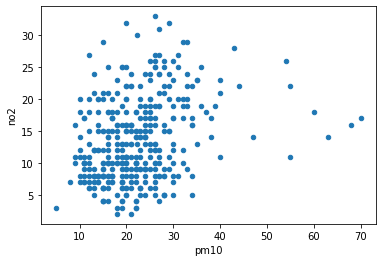

In [20]:
dfContBarcPobl_PM10_NO2_2020_rellenado.plot.scatter('pm10','no2');

Seguimos observando que ambos contaminantes no guardan ninguna correlación

Veamos ahora si siguen algún tipo de ciclo anual.

In [21]:
dfContBarcPobl_PM10_NO2_2020_rellenado['year'] = dfContBarcPobl_PM10_NO2_2020_rellenado.index.year
dfContBarcPobl_PM10_NO2_2020_rellenado['month'] = dfContBarcPobl_PM10_NO2_2020_rellenado.index.month
dfContBarcPobl_PM10_NO2_2020_rellenado['day'] = dfContBarcPobl_PM10_NO2_2020_rellenado.index.day
dfContBarcPobl_PM10_NO2_2020_rellenado['month-day'] = dfContBarcPobl_PM10_NO2_2020_rellenado.index.strftime('%m-%d')
dfContBarcPobl_PM10_NO2_2020_rellenado ['month-day'] = pd.to_datetime(dfContBarcPobl_PM10_NO2_2020_rellenado['month-day'], format='%m-%d', errors='coerce')

print(dfContBarcPobl_PM10_NO2_2020_rellenado)
dfContBarcPobl_PM10_NO2_2020_rellenado.dtypes

            pm10   no2  year  month  day  month-day
date                                               
2020-01-01  17.0  18.0  2020      1    1 1900-01-01
2020-01-02  16.0  18.0  2020      1    2 1900-01-02
2020-01-03  18.0  15.0  2020      1    3 1900-01-03
2020-01-04  18.0  12.0  2020      1    4 1900-01-04
2020-01-05  12.0  18.0  2020      1    5 1900-01-05
...          ...   ...   ...    ...  ...        ...
2020-12-27  10.0   7.0  2020     12   27 1900-12-27
2020-12-28  15.0   8.0  2020     12   28 1900-12-28
2020-12-29  16.0   8.0  2020     12   29 1900-12-29
2020-12-30  13.0  12.0  2020     12   30 1900-12-30
2020-12-31  14.0  12.0  2020     12   31 1900-12-31

[366 rows x 6 columns]


pm10                float64
no2                 float64
year                  int64
month                 int64
day                   int64
month-day    datetime64[ns]
dtype: object

De momento no veo otra manera de hacer el campo month-day como fecha para que en la siguiente gráfica se muestre limpiamente. Pero habría que conseguir que no muestre año 1900

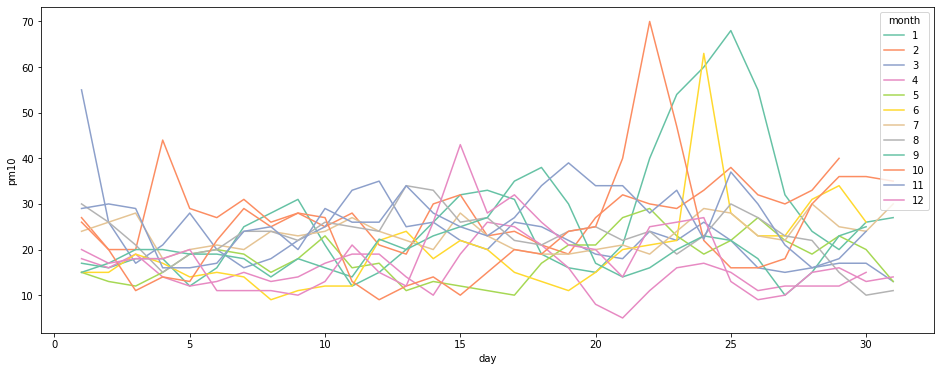

In [26]:
import calendar
plt.figure(figsize=(16, 6))
#plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
sns.lineplot(x='day', y='pm10', hue= 'month', palette= 'Set2', data=dfContBarcPobl_PM10_NO2_2020_rellenado);

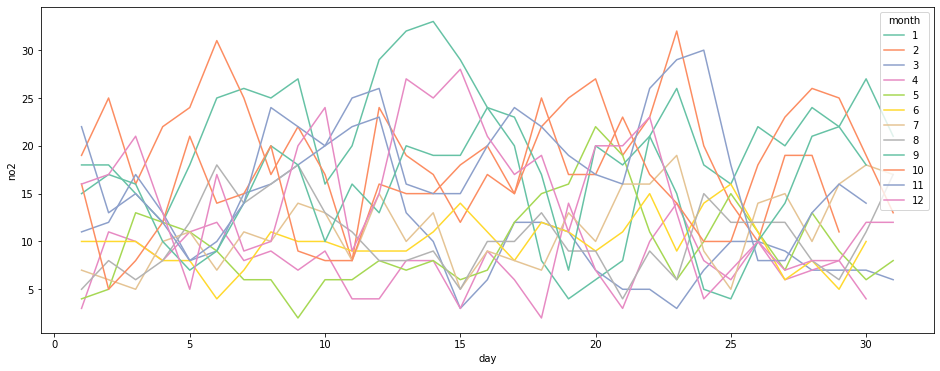

In [27]:
plt.figure(figsize=(16, 6))
#plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
sns.lineplot(x='day', y='no2', hue= 'month', palette= 'Set2', data=dfContBarcPobl_PM10_NO2_2020_rellenado);

Tratamos ahora de pintar líneas medias en los gráficos

In [28]:
#nos aseguramos de que los datos estén ordenados ahora por fecha creciente
dfContBarcPobl_PM10_NO2_2020_rellenado = dfContBarcPobl_PM10_NO2_2020_rellenado.sort_values(by='date')

In [30]:
#creamos un campo con el nº de día para que sirva como eje x de nuestro gráfico
dfContBarcPobl_PM10_NO2_2020_rellenado['ndia'] = np.arange(1,367)
print(dfContBarcPobl_PM10_NO2_2020_rellenado)

            pm10   no2  year  month  day  month-day  ndia
date                                                     
2020-01-01  17.0  18.0  2020      1    1 1900-01-01     1
2020-01-02  16.0  18.0  2020      1    2 1900-01-02     2
2020-01-03  18.0  15.0  2020      1    3 1900-01-03     3
2020-01-04  18.0  12.0  2020      1    4 1900-01-04     4
2020-01-05  12.0  18.0  2020      1    5 1900-01-05     5
...          ...   ...   ...    ...  ...        ...   ...
2020-12-27  10.0   7.0  2020     12   27 1900-12-27   362
2020-12-28  15.0   8.0  2020     12   28 1900-12-28   363
2020-12-29  16.0   8.0  2020     12   29 1900-12-29   364
2020-12-30  13.0  12.0  2020     12   30 1900-12-30   365
2020-12-31  14.0  12.0  2020     12   31 1900-12-31   366

[366 rows x 7 columns]


In [31]:
#creamos la línea media polinómica del PM10, definiéndola de orden 6, pues hemos visto que es la que resulta más adecuada
lineamediapm10 = np.polyfit(dfContBarcPobl_PM10_NO2_2020_rellenado['ndia'], dfContBarcPobl_PM10_NO2_2020_rellenado['pm10'], 6)
print(lineamediapm10)

[-3.84849935e-12  4.41904692e-09 -1.95178769e-06  4.11483084e-04
 -4.11182014e-02  1.59746565e+00  1.15453916e+01]


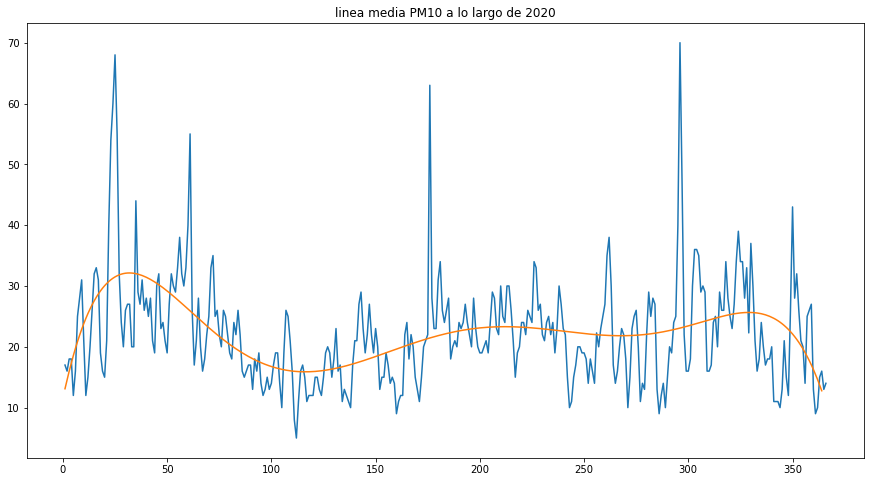

In [33]:
#pintamos la línea media polinómica del PM10
yl=np.poly1d(lineamediapm10)
xl=np.arange(1,365)
plt.figure(figsize=(15,8))
plt.title('linea media PM10 a lo largo de 2020')
plt.plot(dfContBarcPobl_PM10_NO2_2020_rellenado['ndia'],dfContBarcPobl_PM10_NO2_2020_rellenado['pm10'], '-', xl, yl(xl), '-')
plt.show()

In [35]:
#hacemos lo mismo para el NO2
lineamediano2 = np.polyfit(dfContBarcPobl_PM10_NO2_2020_rellenado['ndia'], dfContBarcPobl_PM10_NO2_2020_rellenado['no2'], 6)
print(lineamediano2)

[-1.85806254e-12  2.07199158e-09 -8.88255313e-07  1.80653162e-04
 -1.67440550e-02  4.76415988e-01  1.76941475e+01]


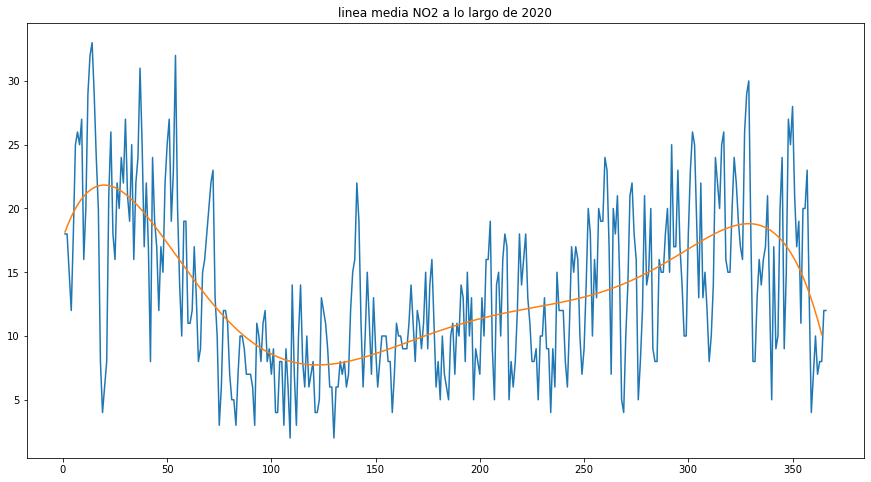

In [36]:
#pintamos la línea media polinómica del NO2
yl=np.poly1d(lineamediano2)
xl=np.arange(1,365)
plt.figure(figsize=(15,8))
plt.title('linea media NO2 a lo largo de 2020')
plt.plot(dfContBarcPobl_PM10_NO2_2020_rellenado['ndia'],dfContBarcPobl_PM10_NO2_2020_rellenado['no2'], '-', xl, yl(xl), '-')
plt.show()

Por los gráficos se ve que la pandemia, y su correspondiente influencia en la caída del tráfico desde marzo, ha afectado a ambos contaminantes, pero especialemente al NO2, que cae drásticamente desde esas fechas.

Miramos ahora un grafico de cajas para ver si hay valores atípicos

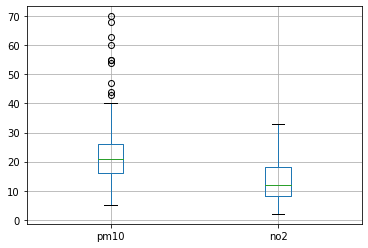

In [38]:
dfContBarcPobl_PM10_NO2_2020_rellenado.boxplot(column=['pm10','no2']);

Miramos cuántos valores atípicos tiene la medida de PM10

In [39]:
Q1=dfContBarcPobl_PM10_NO2_2020_rellenado.pm10.quantile(0.25)
Q3=dfContBarcPobl_PM10_NO2_2020_rellenado.pm10.quantile(0.75)
IQ=Q3-Q1
print(Q1)
print(Q3)
print(IQ)
print(Q1-1.5*IQ)
print(Q3+1.5*IQ)

16.0
26.0
10.0
1.0
41.0


In [40]:
print(dfContBarcPobl_PM10_NO2_2020_rellenado.pm10.loc[dfContBarcPobl_PM10_NO2_2020_rellenado.pm10>Q3+1.5*IQ])
print(dfContBarcPobl_PM10_NO2_2020_rellenado.pm10.loc[dfContBarcPobl_PM10_NO2_2020_rellenado.pm10>Q3+1.5*IQ].shape)

date
2020-01-23    54.0
2020-01-24    60.0
2020-01-25    68.0
2020-01-26    55.0
2020-02-04    44.0
2020-03-01    55.0
2020-06-24    63.0
2020-10-22    70.0
2020-10-23    47.0
2020-12-15    43.0
Name: pm10, dtype: float64
(10,)


Hay 10 valores atípicos (por encima) de PM10

Ahora miramos lo mismo para la medida de NO2

In [41]:
Q1=dfContBarcPobl_PM10_NO2_2020_rellenado.no2.quantile(0.25)
Q3=dfContBarcPobl_PM10_NO2_2020_rellenado.no2.quantile(0.75)
IQ=Q3-Q1
print(Q1)
print(Q3)
print(IQ)
print(Q1-1.5*IQ)
print(Q3+1.5*IQ)

8.0
18.0
10.0
-7.0
33.0


In [42]:
print(dfContBarcPobl_PM10_NO2_2020_rellenado.no2.loc[dfContBarcPobl_PM10_NO2_2020_rellenado.no2>Q3+1.5*IQ])
print(dfContBarcPobl_PM10_NO2_2020_rellenado.no2.loc[dfContBarcPobl_PM10_NO2_2020_rellenado.no2>Q3+1.5*IQ].shape)

Series([], Freq: D, Name: no2, dtype: float64)
(0,)


No hay ningún valor atípico de la medida de NO2

No vamos a eliminar los valores atípicos, pues consideramos que son valores reales de días de una contaminación superior a lo normal.

Vamos ahora a generar el fichero 'contaminacionBarcelona2020.csv' con el Dataframe trabajado hasta ahora

In [43]:
try:
    dfContBarcPobl_PM10_NO2_2020_rellenado.to_csv('contaminacionBarcelona2020.csv', columns =['pm10','no2','year','month','day','month-day','ndia'], sep=",", encoding = 'utf-8', index='date')
except:
    print("Error al crear el fichero csv")